In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from lifelines import KaplanMeierFitter, CoxPHFitter
import torch

In [2]:
df_all = pd.read_csv('/home/sujeong/data/code15/exams.csv')
df_all

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345774,1123951,33,True,35.893005,False,False,False,False,False,False,770553,False,2.189039,True,exams_part2.hdf5
345775,954704,73,False,68.169136,False,False,False,False,False,False,1044781,False,2.520546,False,exams_part2.hdf5
345776,589697,75,False,78.080810,False,False,False,False,False,False,1020589,False,3.304107,False,exams_part2.hdf5
345777,2780563,44,False,73.120636,False,False,False,False,False,False,178,False,7.339720,False,exams_part2.hdf5


In [3]:
def cal_eval(csv_file):
    # from sklearn.metrics import mean_absolute_error, r2_score
    from torchmetrics import MeanAbsoluteError, R2Score, MatthewsCorrCoef
    from torchmetrics.functional import pearson_corrcoef

    df = pd.read_csv(csv_file)
    age = df['age'].to_numpy()
    predicted_age = df['predicted_age'].to_numpy()

    age = torch.tensor(age).float()
    predicted_age = torch.tensor(predicted_age).float()

    mae = MeanAbsoluteError()(predicted_age, age)
    corrcoef = pearson_corrcoef(predicted_age, age)
    r2_square = R2Score()(predicted_age, age)

    print('MAE: {:.2f}'.format(float(mae)))
    print('Correlation coefficient: {:.2f}'.format(float(corrcoef)))
    print('R square: {:.2f}'.format(float(r2_square)))

In [22]:
csv_file = '../out/resnet1d_att_2/predicted_age.csv'
cal_eval(csv_file)

MAE: 8.39
Correlation coefficient: 0.84
R square: 0.70


In [23]:
test_df = pd.read_csv(csv_file)
test_df

,exam_id,predicted_age,age
0,1793145,63.546160,40
1,1793487,39.720226,56
2,1696468,62.227580,68
3,1805980,79.135680,87
4,1757415,32.841200,37
...,...,...,...
34573,1123951,31.980145,33
34574,954704,68.849060,73
34575,589697,72.318344,75
34576,2780563,60.032253,44


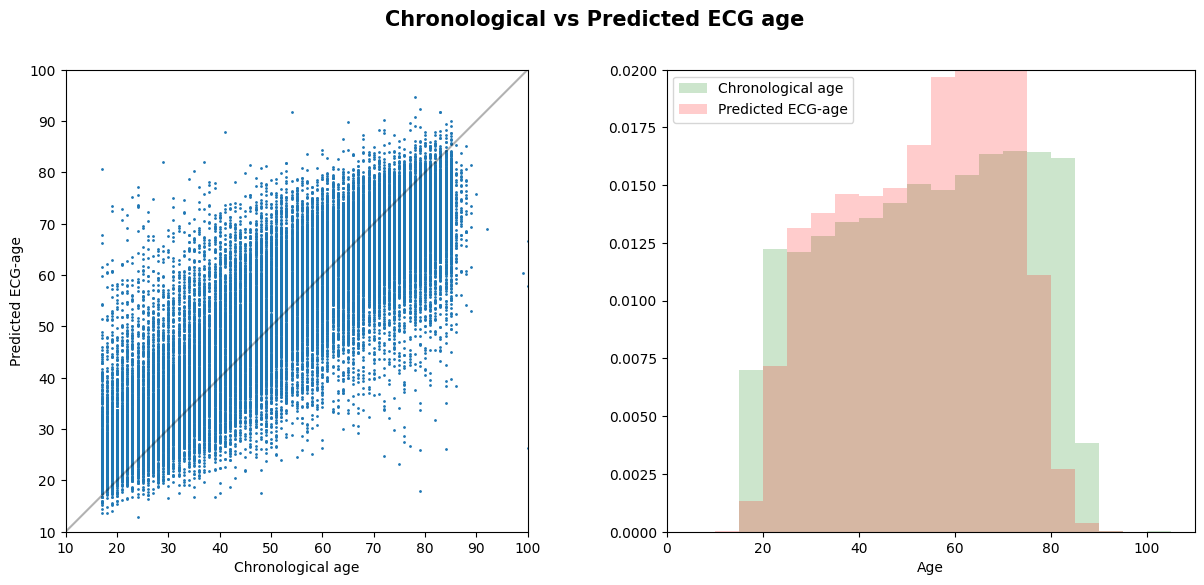

In [24]:
age = test_df['age'].to_numpy()
predicted_age = test_df['predicted_age'].to_numpy()

fig = plt.figure(figsize=(15, 6))
fig.suptitle('Chronological vs Predicted ECG age', fontweight='semibold', fontsize=15)

plt.subplot(1, 2, 1)
plt.plot(age, predicted_age, 'o', markersize=1)
plt.plot([10, 100], [10, 100], 'black', alpha=0.3)
plt.xlabel('Chronological age')
plt.ylabel('Predicted ECG-age')
plt.axis('square')
plt.axis([10, 100, 10, 100])

bins = np.arange(0, 110, 5)

plt.subplot(1, 2, 2)
plt.hist(age, bins=bins, color='green', alpha=0.2, density=True, label='Chronological age')
plt.hist(predicted_age, bins=bins, color='red', alpha=0.2, density=True, label='Predicted ECG-age')
# plt.axis('square')
plt.axis([0, 110, 0, 0.02])
plt.xlabel('Age')
plt.legend()

In [25]:
df = df_all[df_all['exam_id'].isin(df_all['exam_id'])]
df = pd.merge(test_df, df, on=["exam_id", "age"], how="left")
df = df.drop(columns=['nn_predicted_age', 'patient_id', 'trace_file', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF'])
df = df.dropna(subset=['timey', 'death'])
df

,exam_id,predicted_age,age,is_male,death,timey,normal_ecg
0,1793145,63.546160,40,True,False,0.926027,False
1,1793487,39.720226,56,False,False,0.926027,False
4,1757415,32.841200,37,True,False,0.986301,True
5,1773199,37.379482,46,False,False,0.961643,True
8,1689879,66.923180,52,False,False,1.098629,True
...,...,...,...,...,...,...,...
34573,1123951,31.980145,33,True,False,2.189039,True
34574,954704,68.849060,73,False,False,2.520546,False
34575,589697,72.318344,75,False,False,3.304107,False
34576,2780563,60.032253,44,False,False,7.339720,False


In [26]:
less = (df['predicted_age'] - df['age'] < -8)
more = (df['predicted_age'] - df['age'] > 8)
g1 = df[less]
g2 = df[~(less) & ~(more)]
g3 = df[more]
print(len(g1), len(g2), len(g3))

# df.loc[less == True, 'group'] = 1
# df.loc[(less == False) & (more == False), 'group'] = 2
# df.loc[more == True, 'group'] = 3
# df['ecg-age'] = (df['predicted_age'] - df['age'])
df

4423 13253 5289


,exam_id,predicted_age,age,is_male,death,timey,normal_ecg
0,1793145,63.546160,40,True,False,0.926027,False
1,1793487,39.720226,56,False,False,0.926027,False
4,1757415,32.841200,37,True,False,0.986301,True
5,1773199,37.379482,46,False,False,0.961643,True
8,1689879,66.923180,52,False,False,1.098629,True
...,...,...,...,...,...,...,...
34573,1123951,31.980145,33,True,False,2.189039,True
34574,954704,68.849060,73,False,False,2.520546,False
34575,589697,72.318344,75,False,False,3.304107,False
34576,2780563,60.032253,44,False,False,7.339720,False


/home/sujeong/anaconda3/envs/ecg/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/sujeong/anaconda3/envs/ecg/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/sujeong/anaconda3/envs/ecg/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserW

Text(0, 0.5, 'Survival')

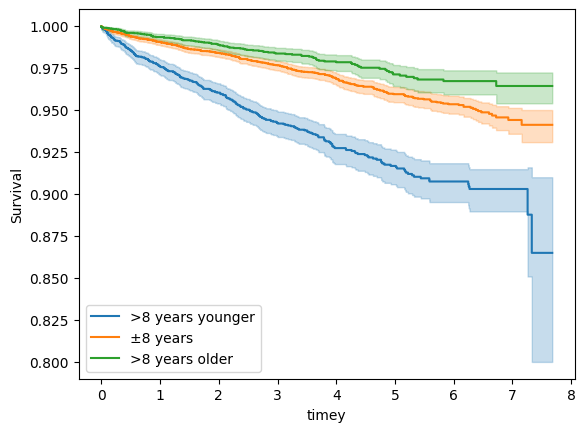

In [27]:
kmf_g1 = KaplanMeierFitter()
kmf_g2 = KaplanMeierFitter()
kmf_g3 = KaplanMeierFitter()
kmf_g1.fit(durations=g1['timey'], event_observed=g1['death'], label=">8 years younger")
kmf_g2.fit(durations=g2['timey'], event_observed=g2['death'], label="±8 years")
kmf_g3.fit(durations=g3['timey'], event_observed=g3['death'], label=">8 years older")

kmf_g1.plot()
kmf_g2.plot()
kmf_g3.plot()

plt.xlabel("timey")
plt.ylabel("Survival")
# plt.title("KMF")

/home/sujeong/anaconda3/envs/ecg/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/sujeong/anaconda3/envs/ecg/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Survival')

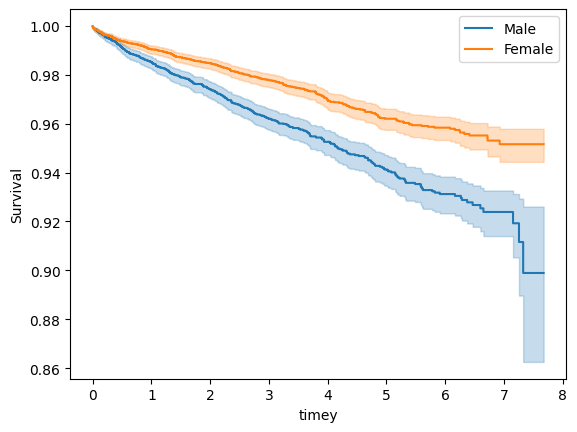

In [28]:
male = df[df['is_male'] == True]
female = df[df['is_male'] == False]

kmf_m = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()
kmf_m.fit(durations=male['timey'], event_observed=male['death'], label="Male")
kmf_f.fit(durations=female['timey'], event_observed=female['death'], label="Female")

kmf_m.plot()
kmf_f.plot()

plt.xlabel("timey")
plt.ylabel("Survival")
# plt.title("KMF")

/home/sujeong/anaconda3/envs/ecg/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/home/sujeong/anaconda3/envs/ecg/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0, 0.5, 'Survival')

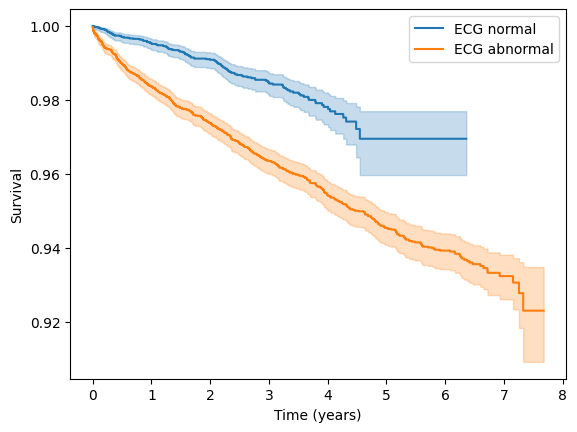

In [29]:
normal = df[df['normal_ecg'] == True]
abnormal = df[df['normal_ecg'] == False]

kmf_n = KaplanMeierFitter()
kmf_a = KaplanMeierFitter()
kmf_n.fit(durations=normal['timey'], event_observed=normal['death'], label="ECG normal")
kmf_a.fit(durations=abnormal['timey'], event_observed=abnormal['death'], label="ECG abnormal")

kmf_n.plot()
kmf_a.plot()

plt.xlabel("Time (years)")
plt.ylabel("Survival")
# plt.title("KMF")

In [54]:
cph = CoxPHFitter()
cph.fit(df.drop(columns=['exam_id', 'predicted_age']), 'timey', event_col='death')
cph.print_summary()

/home/sujeong/anaconda3/envs/ecg/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.CoxPHFitter: fitted with 22965 total observations, 22183 right-censored observations>
             duration col = 'timey'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 22965
number of events observed = 782
   partial log-likelihood = -7067.63
         time fit was run = 2022-12-29 20:01:26 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
age          0.06       1.06       0.00             0.06             0.07                 1.06                 1.07
is_male      0.42       1.52       0.07             0.28             0.56                 1.32                 1.75
normal_ecg  -0.30       0.74       0.10            -0.49            -0.11                 0.61                 0.90

             cmp to     z      p   -log2(p)
covariate                                  
age            0.00 23.31 <0.005     396.79
is_male        0.00  5.86 <0.005      27.70
normal_ecg     0.00 -3.04 <0.005       8.71
---
Concordance = 0.79
Partial AIC = 14141.26
log-likelihood ratio test = 894.21 on 3 df
-log2(p) of ll-ratio test = 640.46

* p-value <0.05 : exam_id, predicted_age, age, is_male, RBBB, LBBB, SB, ST, AF, normal_ecg 기반으로 데이터를 그룹화 가능
* => age, is_male, normal_ecg 기반으로 그룹화
---
### HR (Hazard Ratio) = exp(bi)
* **HR = 1 : No effect**
* **HR < 1 : Reduction in the hazard**
* **HR > 1 : Increase in hazard**

* age
    * p-value: <0.005, HR: 1.05 -> 연령대별로의 사망위험성은 큰 차이가 없음 
* is_male
    * p-value: <0.005, HR: 1.52 -> 성별과 사망위험 증가 사이에 강한 relationship
* normal_ecg
    * p-value: <0.005, HR: 0.66 -> noraml_ecg와 사망위험 감소 사이에 강한 relationship

<AxesSubplot: xlabel='log(HR) (95% CI)'>

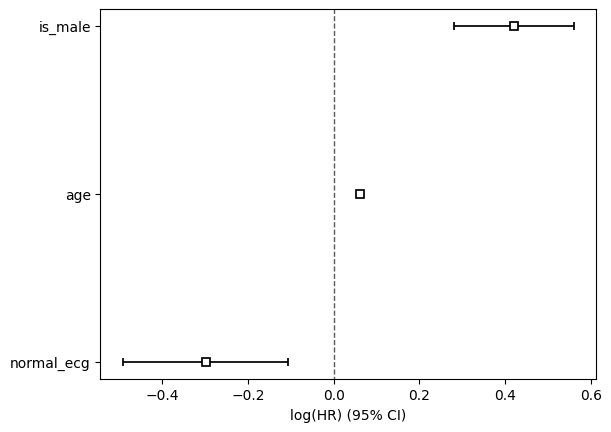

In [55]:
cph.plot()

In [ ]:
ax = cph.plot_partial_effects_on_outcome(covariates = 'is_male', values = ['Male', '1'], plot_baseline=False)

In [ ]:
cph.score(df[more])

In [ ]:
df_age = df.copy()
# df_age['less'] = (df['predicted_age'] - df['age'] < -8)
# df_age['more'] = (df['predicted_age'] - df['age'] > 8)

# df_age.loc[less == True, 'group'] = 1
# df_age.loc[(less == False) & (more == False), 'group'] = 2
# df_age.loc[more == True, 'group'] = 3

# df_age['ecg_age'] = (df['predicted_age'] - df['age']).astype(int)


df_age['ecg_younger'] = (df['predicted_age'] - df['age'] <= -9)
df_age['ecg_older'] = (df['predicted_age'] - df['age'] >= 9)
# df_age['ecg_eq'] = ~df_age['ecg_older'] & ~df_age['ecg_younger']

# df_age = df_age.drop(columns=['exam_id', 'predicted_age', 'age'])
df_age = df_age.drop(columns=['exam_id', 'predicted_age'])


df_age

In [ ]:
cph = CoxPHFitter()
cph.fit(df_age, 'timey', event_col='death', show_progress=True)
cph.print_summary()

In [ ]:
ax = cph.plot_partial_effects_on_outcome(covariates=['ecg_younger', 'ecg_older'], values=[[1, 0], [0, 1]], plot_baseline=False)

In [ ]:
cph.plot_partial_effects_on_outcome('age', values=np.arange(-8, 9, 8), cmap='coolwarm')